A31.5 B30.5 A31.0 G31.0 E42.0 E42.0 G41.0 G40.5 C50.5 C51.0 C41.0 D42.0 D42.0


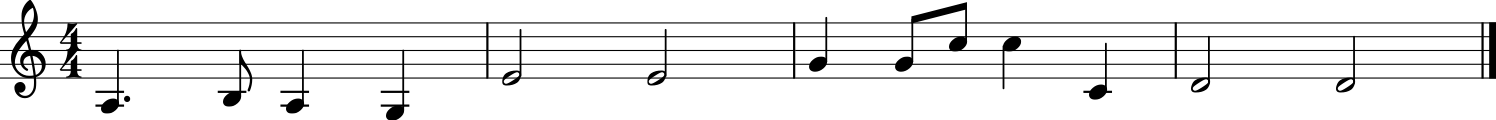

The 1th iteration:


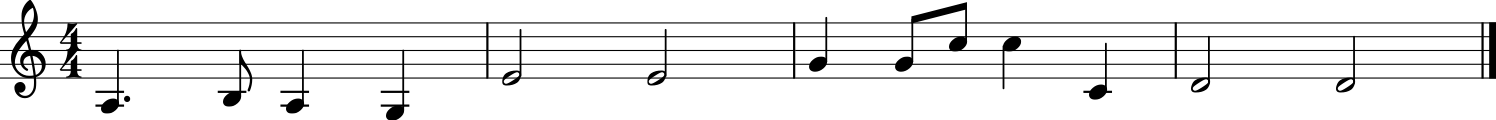

The 21th iteration:


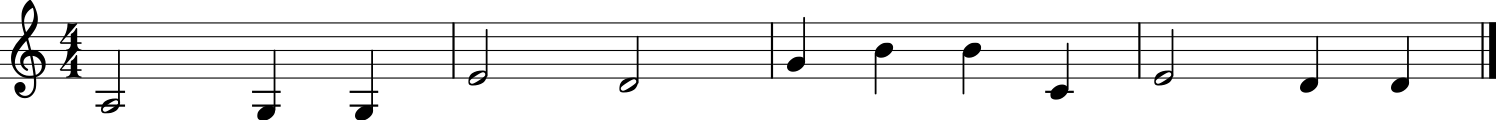

The 41th iteration:


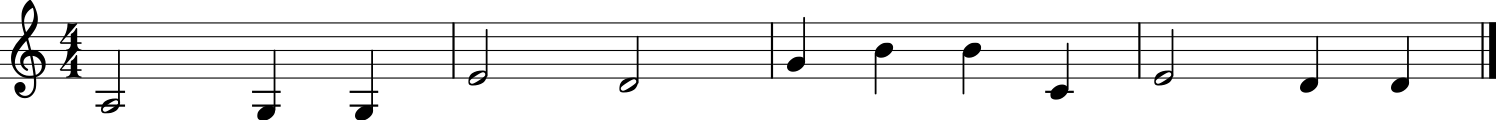

The 61th iteration:


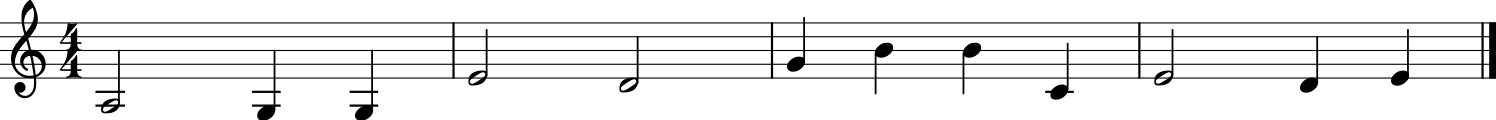

In [3]:
import random
import copy
from music21 import *
import fasttext
from data_pipeline import X2
import matplotlib.pyplot as plt

note_sequence = []
for i in X2:
    for j in i :
        note_sequence.append(j)

note_sequence = ' '.join(note_sequence)
print(note_sequence)
note_se = note_sequence.split(' ')

p = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
pitch_list = []

for i in range(3,6):
    for j in range(len(p)):
        st = p[j] + str(i)
        pitch_list.append(st)


def up_pitch(l):
    selected = random.randint(0,len(l)-1)
    
    if pitch_list.index(l[selected][0]) != pitch_list[len(pitch_list)-1] and pitch_list.index(l[selected][0]) != pitch_list[len(pitch_list)-2]:
        if pitch_list[pitch_list.index(l[selected][0])+1][1] == '#':
            l[selected][0] = pitch_list[pitch_list.index(l[selected][0]) + 2]
        else:
            l[selected][0] = pitch_list[pitch_list.index(l[selected][0]) + 1]
    return l

def down_pitch(l):
    selected = random.randint(0,len(l)-1)
    if pitch_list.index(l[selected][0]) != pitch_list[0] and pitch_list.index(l[selected][0]) != pitch_list[1]:
        if pitch_list[pitch_list.index(l[selected][0])-1][1] == '#':
            l[selected][0] = pitch_list[pitch_list.index(l[selected][0]) - 2]
        else:
            l[selected][0] = pitch_list[pitch_list.index(l[selected][0]) - 1]
    return l

def merge(l):  
    if len(l) >= 2:
        selected = random.randint(0,len(l)-2) 
        l[selected][1] = l[selected][1] + l[selected+1][1]
        del l[selected+1]
    return l

def split(l):
    selected = random.randint(0,len(l)-1)
    function = random.randint(1,1)
    
    temp = []
    temp.append(l[selected][0])
    
    if l[selected][1] > 0.5:
        if function == 1: #1/2,1/2
            temp1 = copy.deepcopy(l[selected][1]/2)
            temp.append(temp1)
            l[selected][1] = l[selected][1]/2
        elif function == 2:#1/3,2/3  
            temp1 = copy.deepcopy(2*l[selected][1]/3)
            temp.append(temp1)
            l[selected][1] = l[selected][1]/3
        elif function == 3:#2/3,1/3
            temp1 = copy.deepcopy(l[selected][1]/3)
            temp.append(temp1)
            l[selected][1] = 2*l[selected][1]/3
        elif function == 4:#1/3,1/3,1/3
            temp1 = copy.deepcopy(l[selected][1]/3)
            temp.append(temp1)
            l[selected][1] = l[selected][1]/3
            l.insert(selected+1,temp)
            
        l.insert(selected+1,temp)
    
    return l

def array2str(x):  # [pitch,duration] -> str(pitch)+str(duration)
    for i in range(len(x)):
        x[i][1] = str(x[i][1])
        x[i] = ''.join(x[i])
    return x

def str2array(l):
    for i in range(len(l)):
        temp = []
        if l[i][1] != '#':
            temp.append(l[i][0:2])
            temp.append(float(l[i][2:]))
        else:
            temp.append(l[i][0:3])
            temp.append(float(l[i][3:]))
            
        l[i] = temp
        
    return l

def change(l,number):
    
    l = str2array(l)
    pool = ['up_pitch(l)','down_pitch(l)','merge(l)','split(l)']
    classifier = fasttext.load_model("workshop/fasttext.bin")
    
    stream1 = stream.Stream()
    for item in l:
        stream1.append(note.Note(item[0],quarterLength=float(item[1])))
    stream1.show()
    
    for i in range(number):
        
        bak = copy.deepcopy(l)
        
        for j in range(3):
            l = eval(random.choice(pool))
        
            temp1 = ' '.join(array2str(l))
            temp2 = ' '.join(array2str(bak)) 

            if (classifier.predict(temp1)[0] == classifier.predict(temp2)[0] and classifier.predict(temp1)[1] >= classifier.predict(temp2)[1]) or (classifier.predict(temp1)[0] != classifier.predict(temp2)[0]): 
                l = copy.deepcopy(bak)

            bak = str2array(bak)
            l = str2array(l)
            temp3 = ' '.join(array2str(copy.deepcopy(l)))
            x.append(i)
            y.append(classifier.predict(temp3)[1])
        if i % 20 == 0:
            print('The {}th iteration:'.format(i+1))
            stream2 = stream.Stream()
            for item in l:
                stream2.append(note.Note(item[0],quarterLength=float(item[1])))
            stream2.show()   
            stream2.show('midi')
    
    return l,bak

x = []
y = []
l,bak = change(note_se,61)